# **Вектор изгнания: лингвистический сдвиг в поэзии Иосифа Бродского**

*Проект по дисциплине Digital Humanities*

_Подготовила **Плохута-Плакутина Елизавета**_

*Цель исследования:* исследовать лексико-семантические сдвиги и поэтические особенности в поэзии Иосифа Бродского до и после эмиграции

## **Загрузка библиотек**

In [1]:
# !pip uninstall -y numpy scipy gensim
!pip install numpy==1.24.4 scipy==1.10.1 gensim==4.3.2

In [2]:
!pip install -q gdown pandas nltk pymorphy3 scikit-learn spacy plotly umap-learn stanza natasha wordcloud

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 857.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/

In [3]:
import nltk
nltk.download('stopwords')
!python -m spacy download ru_core_news_sm

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 58.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [103]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 21.6 MB/s eta 0:00:00


In [104]:
import gdown
import pandas as pd
import re
import numpy as np
import string
from nltk.corpus import stopwords
from pymorphy3 import MorphAnalyzer
from gensim import corpora, models
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
import plotly.express as px
# import matplotlib.cm as cm
import plotly.graph_objects as go
import matplotlib.colors as mcolors
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import colormaps
import plotly.figure_factory as ff
from sklearn.manifold import TSNE
import plotly.graph_objects as go
from sklearn.cluster import KMeans
import networkx as nx
import plotly.graph_objects as go
import plotly.express as px
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go

## **Загрузка данных**

Загружать будем заранее подготовленный датасет с гугл диска.
Датасет состоит из 590 сочинений Иосифа Бродского. К каждому стихотворению указаны временные рамки, когда оно было написано, и более глобальный период - до или после эммиграции.

Временных промежутков всего 6:
1. Стихотворения 1930-1960 г.
1. Стихотворения 1961-1966 г.
1. Стихотворения 1967-1972 г.
1. Стихотворения 1973-1984 г.
1. Стихотворения 1985-1989 г.
1. Стихотворения 1990-1996 г.

Известно, что Бродский был выслан из СССР в 1972 году, разделять стихи на до и после эмиграции мы будем по этой дате.

До эмиграции Иосиф Бродский написал 378 сочинений, а после эмиграции - 212

In [5]:
sharing_url = "https://drive.google.com/file/d/1CWAKMg4fk1TnfPu9XK6TpaRv5OzvvWPm/view?usp=sharing"
file_id = sharing_url.split("/")[-2]

output_path = "brodsky_dataset.csv"
gdown.download(id=file_id, output=output_path, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1CWAKMg4fk1TnfPu9XK6TpaRv5OzvvWPm
To: /content/brodsky_dataset.csv
100%|██████████| 2.02M/2.02M [00:00<00:00, 161MB/s]


'brodsky_dataset.csv'

In [6]:
df = pd.read_csv(output_path, low_memory=False)

In [7]:
df

,author,title,text,time_period,emigration_period
0,Бродский,Воспоминания,Белое небо\n крутится надо мною.\n Зем...,Стихотворения 1930-1960 г.,До эмиграции
1,Бродский,Гладиаторы,Простимся.\n До встреч в могиле.\n Бли...,Стихотворения 1930-1960 г.,До эмиграции
2,Бродский,x x x,"Зачем опять меняемся местами,\n зачем опят...",Стихотворения 1930-1960 г.,До эмиграции
3,Бродский,x x x,И вечный бой.\n Покой нам только снится.\n...,Стихотворения 1930-1960 г.,До эмиграции
4,Бродский,Критерии,"""...с маленькой смертью встреча""\n (...",Стихотворения 1930-1960 г.,До эмиграции
...,...,...,...,...,...
585,Бродский,С натуры,"Джироламо Марчелло\n\n Солнце садится, и б...",Стихотворения 1990-1996 г.,После эмиграции
586,Бродский,Стакан с водой,"Ты стоишь в стакане передо мной, водичка,\n ...",Стихотворения 1990-1996 г.,После эмиграции
587,Бродский,Ere perennius,Приключилась на твердую вещь напасть:\n бу...,Стихотворения 1990-1996 г.,После эмиграции
588,Бродский,Август,"Маленькие города, где вам не скажут правду.\n ...",Стихотворения 1990-1996 г.,После эмиграции


In [8]:
df['emigration_period'].value_counts()

,count
emigration_period,
До эмиграции,378
После эмиграции,212


## **Предобработка**

Предобработаем наш датасет, уберем все, что может быть лишним (неудалившаяся метаинформация в текстах, тегов, редактуры, перевода и прочего), также очистим от знаков препинания.

Основу для стоп-слов мы возьмем из NLTK, однако добавим к ним кастомных, специфичных именно для Бродского (он любил вводные конструкции, однако, чего-то полезного для нашей задачи они не несут).

Также токенизируем тексты и лемматизируем слова при помощи блиблиотеки пайморфи.

In [9]:
stop_words = set(stopwords.words('russian'))

# Добавляем кастомные вводные конструкции
custom_stop_phrases = {
    'вообще', 'в сущности', 'на самом деле', 'впрочем', 'между тем', 'однако', 'тем не менее',
    'кстати', 'например', 'словно', 'будто', 'как будто', 'вроде', 'якобы', 'дескать', 'мол',
    'кажется', 'вероятно', 'возможно', 'пожалуй', 'наверно', 'наверное', 'очевидно', 'видимо',
    'по-видимому', 'по сути', 'по крайней мере', 'по меньшей мере', 'по правде говоря',
    'если честно', 'честно говоря', 'так сказать', 'собственно', 'собственно говоря',
    'по большому счету', 'это', 'этот', 'чей', 'который', 'лишь', 'просто', 'весь', 'вся',
    'всю', 'иной', 'твой', 'ваш', 'ими', 'нами', 'вами', 'кто-то', 'что-то', 'где-то',
    'когда-то', 'почему-то', 'зачем-то', 'как-то',
    # местоимения
    'меня', 'тебя', 'его', 'её', 'нас', 'вас', 'их',
    'мне', 'тебе', 'ему', 'ей', 'нам', 'вам', 'им',
    'себя',
    'мой', 'твой', 'наш', 'ваш', 'свой'
}

morph = MorphAnalyzer()

for phrase in custom_stop_phrases:
    for word in phrase.split():
        stop_words.add(word)

def preprocess_text(text):
    # Удалим мета-теги, редактуру, перевод и прочее
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'\[.*?\]', '', text)

    # Приведем кавычки и тире к одному виду
    text = text.replace('—', ' ').replace('–', ' ').replace('«', '"').replace('»', '"')

    # Удалим все лишнее кроме букв
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\d+', '', text)
    text = text.lower()

    # Токенизируем и лемматизируем
    tokens = text.split()
    lemmas = []
    for token in tokens:
        lemma = morph.parse(token)[0].normal_form
        if lemma not in stop_words and len(lemma) > 2:
            lemmas.append(lemma)
    return lemmas

In [10]:
tqdm.pandas()

df['tokens'] = df['text'].progress_apply(preprocess_text)

  0%|          | 0/590 [00:00<?, ?it/s]

In [11]:
df.head()

,author,title,text,time_period,emigration_period,tokens
0,Бродский,Воспоминания,Белое небо\n крутится надо мною.\n Зем...,Стихотворения 1930-1960 г.,До эмиграции,"[белый, небо, крутиться, земля, серый, тарахте..."
1,Бродский,Гладиаторы,Простимся.\n До встреч в могиле.\n Бли...,Стихотворения 1930-1960 г.,До эмиграции,"[проститься, встреча, могила, близиться, время..."
2,Бродский,x x x,"Зачем опять меняемся местами,\n зачем опят...",Стихотворения 1930-1960 г.,До эмиграции,"[меняться, место, всё, нужный, плыть, московск..."
3,Бродский,x x x,И вечный бой.\n Покой нам только снится.\n...,Стихотворения 1930-1960 г.,До эмиграции,"[вечный, бой, покой, сниться, пусть, ничто, по..."
4,Бродский,Критерии,"""...с маленькой смертью встреча""\n (...",Стихотворения 1930-1960 г.,До эмиграции,"[маленький, смерть, встреча, гарсиа, лорка, ма..."


## **POS-разметка**

Также нам нужна частеречная разметка, чтобы посмотреть статистику по частям речи, используем для этого пайморфи.

In [12]:
def get_pos_tags(tokens):
    pos_tags = []
    for token in tokens:
        parse = morph.parse(token)
        if parse:
            pos = parse[0].tag.POS
            pos_tags.append((token, pos))
        else:
            pos_tags.append((token, None))
    return pos_tags

In [13]:
df['pos_tags'] = df['tokens'].progress_apply(get_pos_tags)

  0%|          | 0/590 [00:00<?, ?it/s]

In [14]:
df.head()

,author,title,text,time_period,emigration_period,tokens,pos_tags
0,Бродский,Воспоминания,Белое небо\n крутится надо мною.\n Зем...,Стихотворения 1930-1960 г.,До эмиграции,"[белый, небо, крутиться, земля, серый, тарахте...","[(белый, ADJF), (небо, NOUN), (крутиться, INFN..."
1,Бродский,Гладиаторы,Простимся.\n До встреч в могиле.\n Бли...,Стихотворения 1930-1960 г.,До эмиграции,"[проститься, встреча, могила, близиться, время...","[(проститься, INFN), (встреча, NOUN), (могила,..."
2,Бродский,x x x,"Зачем опять меняемся местами,\n зачем опят...",Стихотворения 1930-1960 г.,До эмиграции,"[меняться, место, всё, нужный, плыть, московск...","[(меняться, INFN), (место, NOUN), (всё, PRCL),..."
3,Бродский,x x x,И вечный бой.\n Покой нам только снится.\n...,Стихотворения 1930-1960 г.,До эмиграции,"[вечный, бой, покой, сниться, пусть, ничто, по...","[(вечный, ADJF), (бой, NOUN), (покой, NOUN), (..."
4,Бродский,Критерии,"""...с маленькой смертью встреча""\n (...",Стихотворения 1930-1960 г.,До эмиграции,"[маленький, смерть, встреча, гарсиа, лорка, ма...","[(маленький, ADJF), (смерть, NOUN), (встреча, ..."


## **Разделение на 2 датасета**

Разделим токены на два датасета: до эмиграции и после.

In [15]:
corpus_before = df[df['emigration_period'] == 'До эмиграции']['tokens'].tolist()
corpus_after = df[df['emigration_period'] == 'После эмиграции']['tokens'].tolist()

In [16]:
len(corpus_before)

378

In [17]:
len(corpus_after)

212

## **Word2Vec**

Применим word2vec к нашим подкорпусам. У нас получается 2 модели: до эмиграции и после.

In [25]:
# Параметры модели
vector_size = 500     # Поставим побольше, тк корпус маленький, лексика богатая, модель сможет уловить более тонкие различия
window = 7            # Поставим широкое окно контекста, чтобы находить больше синонимов (у Бродского специфический синтаксис и между синонимами может быть много слов + у нас поэзия)
min_count = 2         # Сохраним редкие слова, тк корпус маленький
sg = 1                # Skip-gram = 1, CBOW = 0
epochs=40             # Поставим больше эпох, чтобы модель подольше обучалась и повысилось ее качество
alpha=0.03            # Поставим чуть большую скорость обучения, чтобы ускорить обучение модели в начале
negative=15           # 15 негативных примеров для модели на каждый положительный, тк корпус маленький
sample=1e-3           # Поставим порог для удаления сверхчастотных слов

# Обучаем модель на корпусе до эмиграции
model_before = Word2Vec(
    sentences=corpus_before,
    vector_size=vector_size,
    window=window,
    min_count=min_count,
    sg=sg,
    workers=4,
    seed=42,
    epochs=epochs,
    alpha=alpha,
    negative=negative,
    sample=sample
)

# Обучаем другую модель на корпусе после эмиграции
model_after = Word2Vec(
    sentences=corpus_after,
    vector_size=vector_size,
    window=window,
    min_count=min_count,
    sg=sg,
    workers=4,
    seed=42,
    epochs=epochs,
    alpha=alpha,
    negative=negative,
    sample=sample
)

Проверим качество моделей на отдельных словах и найдем похожие на них.

In [26]:
model_before.wv.most_similar('смерть')

[('скелет', 0.4013740122318268),
 ('коса', 0.3948325216770172),
 ('назо', 0.3824564218521118),
 ('жердь', 0.37087610363960266),
 ('подле', 0.3570649027824402),
 ('невозможность', 0.3535252511501312),
 ('бант', 0.3531407415866852),
 ('цапля', 0.3455381691455841),
 ('новостройка', 0.3436537981033325),
 ('подчас', 0.33513709902763367)]

In [27]:
model_before.wv.most_similar('время')

[('бремя', 0.3943997919559479),
 ('недоверчивость', 0.34680241346359253),
 ('учительный', 0.3441790044307709),
 ('блюдце', 0.3437899649143219),
 ('ордер', 0.3431796133518219),
 ('недорогой', 0.3341425061225891),
 ('древо', 0.329699844121933),
 ('племя', 0.3252802789211273),
 ('сражение', 0.32510906457901),
 ('бегом', 0.3230035901069641)]

In [28]:
model_after.wv.most_similar('смерть')

[('работать', 0.5324813723564148),
 ('овощ', 0.5095981955528259),
 ('образование', 0.5019265413284302),
 ('свежий', 0.5003447532653809),
 ('уезжать', 0.49774524569511414),
 ('свидетель', 0.4940744936466217),
 ('флоренция', 0.48922455310821533),
 ('прах', 0.4876761734485626),
 ('санки', 0.48456186056137085),
 ('воин', 0.4819454252719879)]

In [29]:
model_after.wv.most_similar('время')

[('прошедшее', 0.3661108911037445),
 ('преграда', 0.36124762892723083),
 ('нужда', 0.356050968170166),
 ('холодное', 0.3520274758338928),
 ('выживать', 0.34632983803749084),
 ('отличие', 0.34484443068504333),
 ('получать', 0.3447902202606201),
 ('семён', 0.3440316915512085),
 ('горизонтально', 0.34041380882263184),
 ('привидение', 0.3396334946155548)]

Качество не идеальное, так как корпус маленький, и в целом модели выдают скорее не синонимы, а слова, которые употребляются в одном контексте. Но бывают и бриллианты - например, для слова _смерть_ модель до эмиграции выдает скелет и косу, которые довольно сильно связаны со смертью в культуре. Модель после эмиграции для смерти выдает прах, что тоже хорошо.

## **Семантическое сравнение ключевых слов**

Так как мы хотим посмотреть разницу в Бродском до и после эмиграции, то и ключевые слова надо взять подобающие.
Мы обязательно возьмем слово _родина_, чтобы понять, как представление о ней у Бродского поменялось. Также мы возьмем слова _город_, _море_, _дорога_, _пейзаж_, так как у Бродского есть много описаний античности, повседневной жизни, морской темы.
Как мы знаем, стихи Бродского крайне философичны, а значит возьмем такие концепты как _пространство_, _тело_ и _смерть_.

In [30]:
key_words = ['город', 'море', 'смерть', 'дорога', 'тело', 'пейзаж', 'родина', 'пространство']

При помощи этой функции получаем список наиболее близких по смыслу слов (для этого используется косинусное расстояние) к ключевому:

In [31]:
def get_nearest_neighbors(word, model, topn=10):
    if word in model.wv:
        return model.wv.most_similar(word, topn=topn)
    else:
        return []

При помощи этой функции собираем векторы ключевых слов и их соседей из наших двух моделей:

In [32]:
def collect_embeddings(word_list, model, label):
    words = []
    vectors = []
    for word in word_list:
        if word in model.wv:
            words.append(f"{word}_{label}")
            vectors.append(model.wv[word])
            for neighbor, _ in get_nearest_neighbors(word, model):
                if neighbor in model.wv:
                    words.append(f"{neighbor}_{label}")
                    vectors.append(model.wv[neighbor])
    return words, vectors

In [33]:
words_b, vecs_b = collect_embeddings(key_words, model_before, "до")
words_a, vecs_a = collect_embeddings(key_words, model_after, "после")

In [34]:
all_words = words_b + words_a
all_vecs = np.array(vecs_b + vecs_a)

Чтобы сделать визуализацию, мы уменьшим размерность до двухмерного пространства при помощи t-SNE.

In [35]:
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='pca', max_iter=1000)
embeds_2d = tsne.fit_transform(all_vecs)

При помощи этой функции удалим метки "_до" и "_после":

In [36]:
def strip_label(w):
    return w.rsplit('_', 1)[0]

In [37]:
base_words = [strip_label(w) for w in all_words]

Создадим список уникальных базовых слов в порядке их появления (порядок учитываем, чтобы цвета визуализации соответствовали).

In [38]:
unique_words = list(dict.fromkeys(base_words))

Создадим словарь маппящий слово и индекс.

In [39]:
word_to_idx = {w: i for i, w in enumerate(unique_words)}

Создадим цветовую палитру:
Теплые цвета (оттенки оранжевого) будут для слов до эмиграции,
Холодные цвета (оттенки синего) - для слов после эмиграции.

In [45]:
warm_cmap = colormaps['Oranges'].resampled(len(unique_words))
cool_cmap = colormaps['Blues'].resampled(len(unique_words))

colors = []
for w in all_words:
    base_w = strip_label(w)
    idx = word_to_idx[base_w]
    cmap = warm_cmap if w.endswith('_до') else cool_cmap
    rgba = cmap(idx)
    colors.append(mcolors.to_hex(rgba))

Создадим датафрейм, где

* word — слово с меткой (например, город_до, город_после)

* x, y — координаты на 2D-плоскости

* period — метка периода (до/после)

* base_word — основа слова (город)

* color — hex-цвет для визуализации

In [46]:
df_plot = pd.DataFrame({
    'word': all_words,
    'x': embeds_2d[:, 0],
    'y': embeds_2d[:, 1],
    'period': ['до' if w.endswith('_до') else 'после' for w in all_words],
    'base_word': base_words,
    'color': colors
})

In [47]:
color_map = dict(zip(all_words, colors))

In [48]:
key_word_set = set(key_words)
df_plot['is_key_word'] = df_plot['base_word'].apply(lambda w: w in key_word_set)

На графике соседние слова будут в виде кружочков разных оттенков, ключевые слова будут в виде больших ромбиков (тоже разного размера).

In [49]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_plot.loc[~df_plot['is_key_word'], 'x'],
    y=df_plot.loc[~df_plot['is_key_word'], 'y'],
    mode='markers+text',
    text=df_plot.loc[~df_plot['is_key_word'], 'word'],
    textposition='top center',
    marker=dict(color=df_plot.loc[~df_plot['is_key_word'], 'color'], size=8, symbol='circle'),
    name='Соседи'
))

fig.add_trace(go.Scatter(
    x=df_plot.loc[df_plot['is_key_word'], 'x'],
    y=df_plot.loc[df_plot['is_key_word'], 'y'],
    mode='markers+text',
    text=df_plot.loc[df_plot['is_key_word'], 'word'],
    textposition='top center',
    marker=dict(color=df_plot.loc[df_plot['is_key_word'], 'color'], size=25, symbol='diamond'),
    name='Ключевые слова'
))

fig.update_layout(
    title="Сравнение слов до и после эмиграции",
    width=900,
    height=700
)

fig.show()

После сопоставления семантических соседей ключевых слов в поэзии Бродского до и после эмиграции можно ясно увидеть, как изменился его поэтический мир.

Приведем список соседей до и после:

**город**  

* До: возводить, безум, отряд, выколоть, двинуть  

* После: теодор, вдогонку, ансамбль, молоко, сдаваться  

**море**  

* До: турция, переехать, пятьдесят, сушить, стручок  

* После: фаэтон, дик, прибой, присматриваться, морщить  

**смерть**  

* До: скелет, коса, назо, жердь, подле  

* После: работать, овощ, образование, свежий, уезжать  

**дорога**  

* До: сталкивать, конвоир, сходиться, сельский, развезти  

* После: гласить, шашлык, заводить, карл, вырасти  

**тело**  

* До: отборный, вытесняться, значение, измена, распоряжаться  

* После: шиллер, минус, неспособность, гуща, отделяться  

**пейзаж**  

* До: горизонтальный, значительный, учительный, простёртый, натюрморт  

* После: барометр, молить, пустяк, плодить, запомнить  

**родина**  

* До: проезд, прикраса, включить, финляндский, нарядный  

* После: зона, отчество, смешанный, маршал, украсть  

**пространство**  

* До: вытесняться, напугать, упрямство, стылый, символизировать  

* После: вытеснить, жаждать, корм, град, упрямство  

Рассмотрим изменение соседей для каждого ключевого слова отдельно.

1. **Город**. Как нам известно, до эмиграции Бродский жил в Ленинграде. В тот период его жизни слово "город" ассоциировалось с насилием ("выколоть"), коллективным действием ("отряд", "двинуть") и абсурдом ("безум"). Образы отражали тоталитарное пространство, где доминирует принуждение ("возводить").
После эмиграции появились бытовые детали ("молоко"), культурные отсылки ("теодор" – вероятно, Теодор Адорно), мотивы ускользания ("вдогонку") и пассивности ("сдаваться"). Город утратил монолитность, став набором разрозненных элементов ("ансамбль").

2. **Море**.
До эмиграции присутствует конкретика ("турция", "пятьдесят"), сельские образы ("стручок") и функциональность ("сушить", "переехать"). Море воспринималось как практический объект.
После появились мифологические отсылки ("фаэтон" – сын Гелиоса), природные явления ("прибой"), наблюдательность ("присматриваться") и эмоциональная реакция ("морщить"). Море обрело поэтическую многомерность.

3. **Смерть**. Представление о смерти тоже изменилось.
До эмиграции были традиционные культурные символы ("скелет", "коса"), предметность ("жердь") и пространственные маркеры ("подле", "назо").
После появились динамика ("работать", "уезжать"), органические метафоры ("овощ"), интеллектуальные категории ("образование") и обновление ("свежий"). Смерть стала процессом, а не статичным символом.

4. **Дорога**.
До эмиграции мы видим конфликт ("сталкивать"), контроль ("конвоир"), сельский контекст ("сельский") и разделение ("развезти").
После появляются культурные коды ("гласить", "карл" – вероятно, Карл Великий), быт ("шашлык"), созидание ("заводить") и развитие ("вырасти"). Дорога превратилась в путь культурного освоения.

5. **Тело**.
До эмиграции тело ассоциируется с такими темами, как селекция ("отборный"), подчинение ("распоряжаться") и предательство ("измена"). Тело – объект манипуляции.
После мы наблюдаем культурные референции ("шиллер"), недостатки ("минус", "неспособность"), глубину ("гуща") и изоляцию ("отделяться"). Акцент сместился на ограниченность телесного опыта.

6. **Пейзаж**.
До главные ассоциаты это дидактичность ("учительный"), значимость ("значительный"), статика ("натюрморт").
После - измеримость ("барометр"), мольба ("молить"), тривиальность ("пустяк") и запоминание ("запомнить"). Пейзаж стал инструментом работы с памятью.

7. **Родина**. Родина в нашем анализе, наверное, самый ключевой концепт.
До у нас формальная красота ("прикраса", "нарядный"), функциональность ("проезд", "включить").
После - территория отчуждения ("зона"), идентичность ("отчество"), смешение ("смешанный") и потеря ("украсть"). Родина превратилась в объект ностальгической рефлексии. Учитывая, что эмиграция для поэта была вынужденной: его фактически выслали из СССР, лишив гражданства, и он не имел возможности попрощаться с родителями, которых больше никогда не увидел, его чувства так или иначе нашли отражение и в его творчестве. Но его чувства не были исключительн негативными. В письме к Брежневу Бродский писал: «Мне горько уезжать из России. Я здесь родился, вырос, жил, и всем, что имею за душой, я обязан ей. Все плохое, что выпадало на мою долю, с лихвой перекрывалось хорошим, и я никогда не чувствовал себя обиженным Отечеством. Не чувствую и сейчас. Ибо, переставая быть гражданином СССР, я не перестаю быть русским поэтом».

8. **Пространство**.
До эмиграции этот концепт был связан с чем-то негативным: вытеснение ("вытесняться"), страх ("напугать"), холод ("стылый").
После пространство стало средой для взаимодействия: активное освоение ("вытеснить"), потребность ("жаждать"), ресурсы ("корм") и устойчивость ("упрямство").

**Заключение**

После эмиграции поэтический мир Бродского претерпел значительные изменения:

* Ушли военизированные и идеологизированные образы ("отряд", "конвоир")

* Появились культурные референции ("теодор", "шиллер", "карл")

* Абстрактные понятия ("смерть", "пространство") обрели связь с повседневностью

* Ключевые слова стали выражать несовершенство ("минус", "неспособность") и процессы ("работать", "вырасти")

* Бытовая лексика ("молоко", "шашлык") уравнялась в правах с философскими категориями

## **Сравнение мешка слов и word2vec**

Теперь мы сравним частотность употребления слов по частям речи в подкорпусах, и противопоставим мешок слов и векторные ассоциации.

Для анализа нам понадобятся теги частей речи. Мы возьмем только существительные, прилагательные и глаголы.

In [52]:
pos_map = {
    'NOUN': 'существительные',
    'VERB': 'глаголы',
    'ADJF': 'прилагательные'
}

Эта функция фильтрует токены по частям речи:

In [53]:
def filter_pos_tokens(pos_tags_list, pos_tag):
    filtered = []
    for doc in pos_tags_list:
        filtered.extend([token for token, pos in doc if pos == pos_tag])
    return filtered

In [54]:
words_before_pos = {}
words_after_pos = {}
for pos_tag in pos_map.keys():
    words_before_pos[pos_tag] = filter_pos_tokens(df[df['emigration_period'] == 'До эмиграции']['pos_tags'], pos_tag)
    words_after_pos[pos_tag] = filter_pos_tokens(df[df['emigration_period'] == 'После эмиграции']['pos_tags'], pos_tag)

Эта функция строит облако слов:

In [55]:
def plot_wordcloud(freq_dict, title):
    wc = WordCloud(width=600, height=300, background_color='white', colormap='viridis').generate_from_frequencies(freq_dict)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

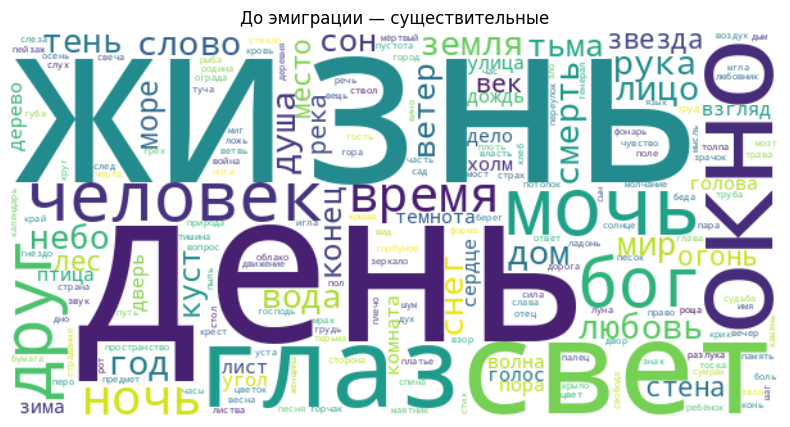

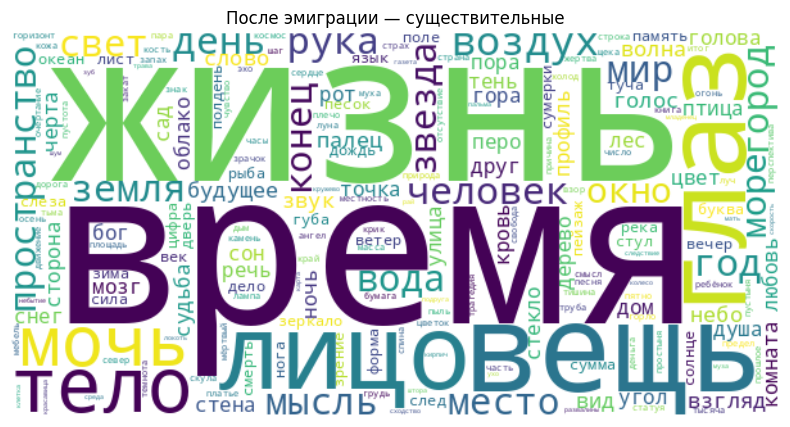

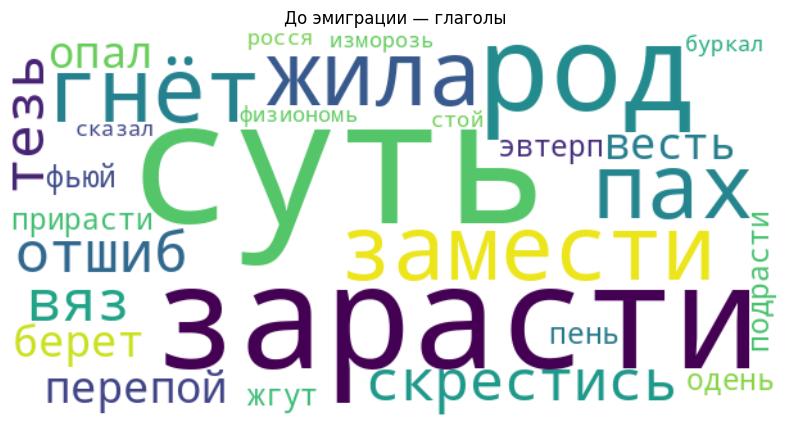

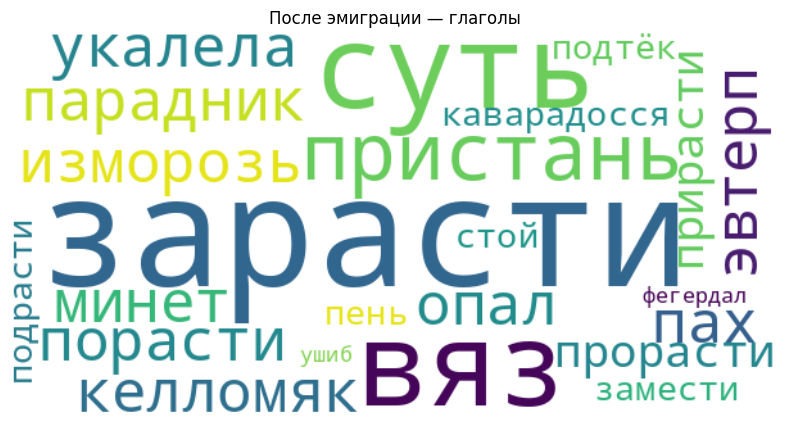

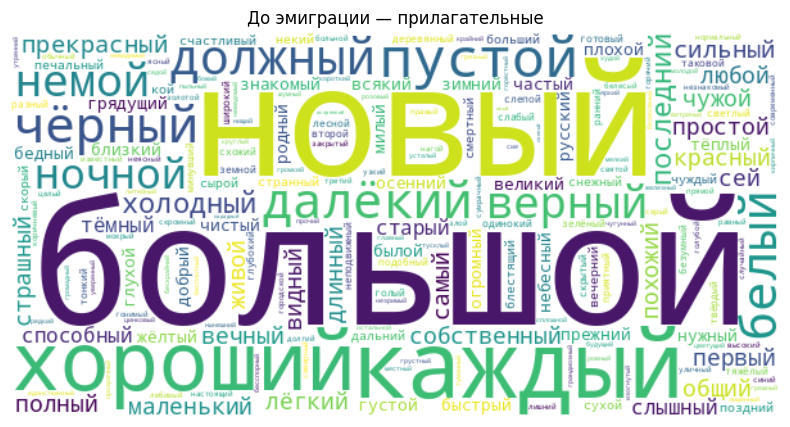

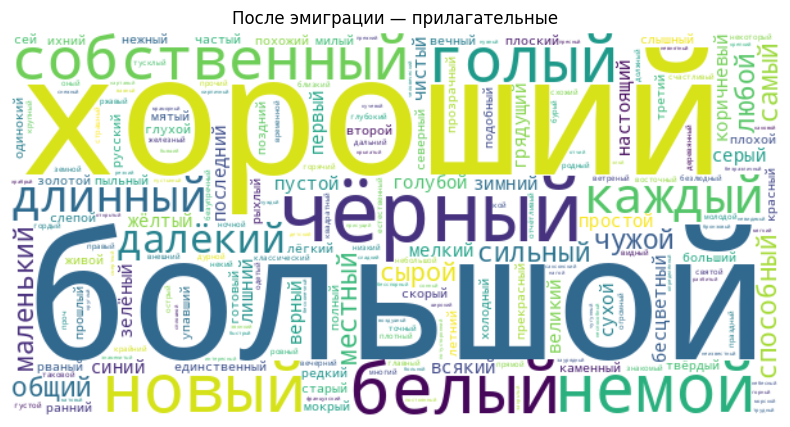

In [56]:
for pos_tag, pos_name in pos_map.items():
    freq_before = Counter(words_before_pos[pos_tag])
    freq_after = Counter(words_after_pos[pos_tag])
    plot_wordcloud(freq_before, f"До эмиграции — {pos_name}")
    plot_wordcloud(freq_after, f"После эмиграции — {pos_name}")

Проанализируем частотные слова по частям речи.

**Существительные**

*До эмиграции*

В центре облака — слова *жизнь*, *день*, *глаз*, *человек*, *ночь*, *друг*, *бог*, *время*, *свет*, *рука*, *дом*, *смерть*, *любовь*, *город*, *вода*, *небо*, *земля*, *тень*, *сон*, *сердце*.
Эти слова отражают ориентацию на внутренний мир, отношения между людьми, религиозные и философские вопросы, а также бытовые и природные детали. Важное место занимают слова, связанные с телесностью и восприятием (*глаз*, *рука*, *лицо*), а также с пространством и временем (*дом*, *город*, *день*, *ночь*, *время*, *год*).

*После эмиграции*

В центре облака остаются *жизнь*, *время*, *лицо*, *глаз*, *человек*, но усиливается роль абстрактных и пространственных понятий: *вещь*, *тело*, *конец*, *место*, *воздух*, *пространство*, *мысль*, *звук*.  
Появляются новые акценты: вместо *дня* и *друга* на первый план выходят *вещь*, *тело*, *воздух*, *мысль*, что говорит о большей абстракции и философичности, а также о внимании к предметному миру и телесности. Становится заметнее интерес к границам, перемещениям, внутренним и внешним пространствам (*пространство*, *место*, *конец*, *окно*, *воздух*).


До эмиграции лексика более конкретна, связана с человеческими отношениями, телом, домом и природой. После эмиграции усиливается роль абстракций, понятий времени и пространства, а также предметного мира и философских категорий.

**Глаголы**  

*До эмиграции*

Частотные глаголы: *зарасти*, *суть*, *скрестись*, *замести*, *гнёт*, *жила*, *род*, *пах*, *взять*, *перепой*, *опал*, *отшиб*, *подрасти*.  
Многие из них связаны с природой, ростом, телесностью, а также с процессами изменения и взаимодействия с окружающим миром (*зарасти*, *скрестись*, *замести*, *пах*, *опал*).

*После эмиграции*

Сохраняются глаголы *зарасти*, *суть*, *вяз*, *опал*, *пах*, но появляются новые: *пристать*, *парадник*, *минет*, *порасти*, *келовомяк*, *прирости*, *эвтерп*, *укалела*, *подтёк*, *каварадосся*.  
Глаголы становятся менее бытовыми и более необычными, появляются неологизмы, редкие и региональные слова, а также термины, связанные с перемещением, переходом, изменением состояния.


До эмиграции глаголы более связаны с природой, бытом и телесностью, после — появляется больше необычных, абстрактных и даже ироничных форм, что отражает усложнение поэтического языка Бродского, его стремление к игре со словом и смыслом.


**Прилагательные**

*До эмиграции*
  
В центре облака находятся прилагательные *большой*, *новый*, *пустой*, *должный*, *белый*, *черный*, *холодный*, *далекий*, *верный*, *старый*, *хороший*, *каждый*, *простой*.

Эти слова отражают:

- Контрастность восприятия: *белый* / *черный*, *новый* / *старый*, *хороший* / *пустой*
- Размерность и пространство: *большой*, *далекий*, *простой*
- Моральные категории: *должный*, *верный*, *хороший*
- Температурные и тактильные ощущения: *холодный*
- Универсальность: *каждый*, *всякий*

Прилагательные до эмиграции более конкретны, часто описывают физические свойства, размеры, цвета и моральные качества. Заметна склонность к антонимичным парам, что создает ощущение мира контрастов.


*После эмиграции*

На первый план выходят прилагательные *собственный*, *голый*, *холодный*, *длинный*, *черный*, *большой*, *белый*, *новый*, *каждый*, *чужой*, *немой*.

Изменения очевидны, они теперь отражают следующие категории:

- Принадлежность и отчуждение: *собственный* / *чужой* — ключевая оппозиция эмигрантского сознания
- Обнаженность и уязвимость: *голый*, *немой* — слова, отражающие экзистенциальную беззащитность
- Протяженность: *длинный* — возможно, связано с ощущением времени в изгнании
- Сохранение базовых контрастов: *черный* / *белый*, но в новом контексте


Если до эмиграции важны были *должный*, *верный*, *хороший* (моральные категории), то после на первый план выходят *собственный* и *чужой* — маркеры принадлежности и отчуждения. Также появляется экзистенциальная лексика: *голый* и *немой* — прилагательные, отражающие состояние духовной и культурной обнаженности в чужой стране. *Чужой* становится одним из центральных слов, что до эмиграции не наблюдалось в такой степени, усиляется степень отчуждения. *Черный* / *белый*, *большой*, *новый* остаются важными, но их семантика, вероятно, меняется под влиянием нового опыта.


**Общие выводы**

До эмиграции поэзия Бродского более конкретна, наполнена образами человеческих отношений, природных и бытовых деталей, телесности, религиозных и философских поисков.  
После эмиграции возрастает роль абстракций, понятий времени, пространства, тела как философской категории; появляется больше необычных, редких и абстрактных слов, усиливается интерес к предметному миру и внутренним состояниям.  
Глаголы становятся менее бытовыми, чаще отражают процессы изменения, перехода, поиска, а также включают больше неологизмов и редких слов. Прилагательные особенно ярко показывают психологическую трансформацию поэта: от мира моральных категорий и физических контрастов к миру экзистенциальной обнаженности и проблем культурной идентичности.

Посмотрим частотность слов до и после эмиграции, построим для этого барплот.

Эта функция возвращает только частоты ключевых слов:

In [57]:
def get_freq_for_key_words(freq_counter, key_words):
    return {word: freq_counter.get(word, 0) for word in key_words}

In [58]:
freq_before_all = Counter([token for doc in df[df['emigration_period'] == 'До эмиграции']['tokens'] for token in doc])
freq_after_all = Counter([token for doc in df[df['emigration_period'] == 'После эмиграции']['tokens'] for token in doc])

freq_before_keys = get_freq_for_key_words(freq_before_all, key_words)
freq_after_keys = get_freq_for_key_words(freq_after_all, key_words)

In [59]:
freq_df = pd.DataFrame({
    'word': key_words,
    'До эмиграции': [freq_before_keys[w] for w in key_words],
    'После эмиграции': [freq_after_keys[w] for w in key_words]
})

fig = go.Figure(data=[
    go.Bar(name='До эмиграции', x=freq_df['word'], y=freq_df['До эмиграции'], marker_color='orange'),
    go.Bar(name='После эмиграции', x=freq_df['word'], y=freq_df['После эмиграции'], marker_color='blue')
])
fig.update_layout(barmode='group', title='Частотность ключевых слов по периодам', yaxis_title='Частота')
fig.show()

Слова *город*, *пейзаж* и *пространство* остаются одинаково частотными в обоих периодах. Это подтверждает, что для Бродского эти категории были и остаются фундаментальными для его поэтики, независимо от места жительства.

Город — один из центральных образов, который сопровождает поэта всю жизнь, меняясь только в деталях: до эмиграции это Ленинград, после — города Европы и Америки, особенно Венеция и Нью-Йорк. Город становится не только географией, но и способом самоидентификации, пространством памяти и размышления.

Пейзаж и пространство — в стихах Бродского всегда важны как сцена для внутренних переживаний, размышлений о времени, бытии и культуре. После эмиграции эти слова сохраняют значимость, но наполняются новыми смыслами: пространство становится более универсальным, а пейзаж — менее привязанным к конкретной стране.

Увеличение частотности слова *тело* после эмиграции говорит о смещении акцента с внешних обстоятельств и пейзажей на внутренний, физический и экзистенциальный опыт.

В эмиграции тема телесности становится важнее: поэт чаще обращается к вопросам физического существования, уязвимости, старения, болезни, а тело становится метафорой границ, отчуждения и личного бытия. Это отражает более философский и универсальный взгляд на человека, характерный для позднего Бродского.

Слова *море* и *дорога* встречаются реже, но не исчезают полностью.

Море в ранней лирике связано с мечтой, путешествием, границей, свободой. После эмиграции оно становится менее романтизированным, чаще воспринимается как часть пейзажа или культурный символ (например, Венеция).

Дорога до эмиграции — это путь, перемещение, часто с оттенком вынужденности или поиска. После эмиграции мотив дороги теряет былую остроту, становится менее личным и более универсальным, отражая не столько бегство или изгнание, сколько жизненный путь в целом.

Наиболее заметно сокращается употребление слов *смерть* и *родина*.

Смерть в ранних стихах — важнейший философский и экзистенциальный мотив. После эмиграции поэт меньше говорит о смерти напрямую, чаще размышляет о ней опосредованно, через темы времени, памяти, одиночества.

Родина — до эмиграции это эмоционально заряженное слово, связанное с личной и национальной идентичностью. После эмиграции тема родины становится более абстрактной и рефлексивной, слово звучит реже, уступая место размышлениям о культуре, языке, памяти, внутренней свободе.

Теперь сравним частотность и векторы.

Эта функция находит соседей по частотности:

In [60]:
def get_freq_neighbors(word, freq_counter, topn=10):
    most_common = [w for w, _ in freq_counter.most_common(topn + 1) if w != word]
    return most_common[:topn]

Эта функция находит соседей в word2vec и сравнивает с частотными соседями по частотности для ключевых слов:

In [61]:
def compare_neighbors(words, model, freq_counter):
    comparison = {}
    for word in words:
        if word in model.wv:
            sg_neighbors = [w for w, _ in model.wv.most_similar(word, topn=10)]
            freq_neighbors = get_freq_neighbors(word, freq_counter, topn=10)
            comparison[word] = {
                'skipgram_neighbors': sg_neighbors,
                'frequency_neighbors': freq_neighbors
            }
    return comparison

In [62]:
comparison_before = compare_neighbors(key_words, model_before, freq_before_all)
comparison_after = compare_neighbors(key_words, model_after, freq_after_all)

Создадим интерактивную таблицу с результатами, где для каждого ключевого слова будут указаны соседи по skip-gram модели и частотные соседи (из корпуса).

In [66]:
def create_neighbors_table(comparison, title):
    header = ['Слово', 'Skip-gram соседи', 'Частотные соседи']
    words = []
    skipgram = []
    frequency = []

    for word, neighbors in comparison.items():
        words.append(word)
        skipgram.append(', '.join(neighbors['skipgram_neighbors']))
        frequency.append(', '.join(neighbors['frequency_neighbors']))

    fig = go.Figure(data=[go.Table(
        columnwidth=[80, 300, 300],
        header=dict(
            values=header,
            fill_color='lightgrey',
            font=dict(size=14, color='black'),
            align='left'
        ),
        cells=dict(
            values=[words, skipgram, frequency],
            align='left',
            font=dict(size=12),
            fill_color='white',
            height=30,
        )
    )])

    fig.update_layout(title=title, height=400)
    fig.show()

In [65]:
create_neighbors_table(comparison_before, "Соседи ключевых слов (До эмиграции)")
create_neighbors_table(comparison_after, "Соседи ключевых слов (После эмиграции)")

Видно, что частотные слова и skip-gram соседи сильно различаются. Но рассуждения выше все же показали, что оба подхода важны. Если не оценивать их в вакууме, а опираться на биографию и анализы стихотворений и творчества в целом, то становится понятно, что подходы скорее дополняют друг друга и подтверждаются предыдущими исследованиями.

## **Кластеризация и визуализация большого количества слов**

Теперь мы посмотрим на более масштабную кластеризацию для 500 самых частотных слов.

Создадим частотный словарь по всему корпусу и ограничим его 500 самыми частотными словами.

In [69]:
all_tokens = [token for tokens in df['tokens'] for token in tokens]
freq_all = Counter(all_tokens)

top_words = [word for word, _ in freq_all.most_common(500)]

Визуализируем модель до эмиграции.

Получим векторы слов из модели до эмиграции.

In [70]:
words_vecs = [(word, model_before.wv[word]) for word in top_words if word in model_before.wv]
words, vecs = zip(*words_vecs)
vecs = np.array(vecs)

Снизим размерность при помощи t-SNE и кластеризуем при помощи KMeans.

In [71]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
vecs_2d = tsne.fit_transform(vecs)

In [81]:
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(vecs)

In [83]:
viz_df = pd.DataFrame({
    'word': words,
    'x': vecs_2d[:, 0],
    'y': vecs_2d[:, 1],
    'cluster': clusters
})

fig = px.scatter(
    viz_df,
    x='x', y='y',
    text='word',
    color='cluster',
    title="500 самых частотных слов до эмиграции (Word2Vec + t-SNE + KMeans)",
    width=900,
    height=700
)

fig.update_traces(marker=dict(size=10), textposition='top center', hovertemplate='%{text}')
fig.show()

Также выведем список слов по кластерам.

In [84]:
for cluster_id in range(n_clusters):
    words_in_cluster = viz_df[viz_df['cluster'] == cluster_id]['word'].tolist()
    print(f"Кластер {cluster_id}:")
    print(", ".join(words_in_cluster))
    print()

Кластер 0:
холодный

Кластер 1:
глаз, знать, видеть, слово, говорить, вещь, хороший, место, стать, пространство, город, пусть, вид, никто, огонь, судьба, сердце, думать, слышать, немой, хотеть, гора, нога, речь, черта, мёртвый, рот, должный, собственный, будущее, общий, правда, цвет, грудь, любой, вперёд, ребёнок, простой, уста, давать, чувствовать, взор, считать, пейзаж, понять, страх, пойти, язык, движение, красный, сей, дым, ладонь, оставлять, буква, оставаться, жёлтый, увы, выйти, имя, голый, губа, горбунов, бояться, выходить, предмет, иметь, дно, входить, пускай, существовать, холод, поскольку, брести, верить, пить, война, смысл, сырой, особенно, ничто, пятно, вино, проходить, тепло, милый, двор, напоминать, слишком, прятать, сниться, нужно, следовать, дух, странно, плюс, тёмный, горизонт, пальто, оба, сходство, русский, вослед, рай, также, хотеться, больший, нету, стремиться, вопрос, океан, ухо, потолок, дуть, спасти, число, попасть, умирать, кроме, маячить, откуда, впереди, исче

Кластер 1 назовем кластером рефлексии и экзистенциализма. Он объединяет слова, связанные с познанием, коммуникацией и внутренними состояниями. В этом кластере доминируют сенсорное восприятие (видеть, слышать), абстрактные категории (пространство, смысл, будущее) и эмоциональные состояния (страх, печаль).

Кластер 2 - временные и природные циклы. Он наиболее масштабный и включает в себя природные явления (снег, дождь, облако, туча), временные маркеры (век, пора, час, память), пространственные образы (дом, окно, дверь, улица, мост).

Кластер 3 - телесность и снова экзистенциализм. В нем есть акцент на физиологии и переходных состояниях: части тела (нога, рот, грудь, губа), действия (стоять, бросить, двигаться), природные метафоры (птица, рыба, роза).

Кластер 7 - культурные коды и экзистенциальные вызовы. Здесь мы наблюдаем сочетание эстетических и метафизических понятий: искусство (песня, зрачок как символ восприятия), абстракции (свобода, ответ) и библейские мотивы (грех).

Кластер 8 - религиозно-философский дискурс. В нем присутствуют слова, связанные с трансцендентным: вертикальные координаты (внизу, выше), тема пространства очень актуальна у Бродского, коммуникация с сакральным (глядеть, услышать).

Кластер 9 - динамика пространства. Этот кластер сочетает в себе глаголы движения и пространственные маркеры: направленность (назад, сквозь), скорость (быстро, скорый), природные препятствия (песок, ветка).

Также есть малые кластеры (0, 4-6). Из-за малого количества слов в них, сложно что-то сказать.

Проделаем то же самое для модели после эмиграции.

In [85]:
words_vecs_after = [(word, model_after.wv[word]) for word in top_words if word in model_after.wv]
words_after, vecs_after = zip(*words_vecs_after)
vecs_after = np.array(vecs_after)

In [86]:
tsne_after = TSNE(n_components=2, perplexity=30, random_state=42)
vecs_2d_after = tsne_after.fit_transform(vecs_after)

In [87]:
kmeans_after = KMeans(n_clusters=n_clusters, random_state=42)
clusters_after = kmeans_after.fit_predict(vecs_after)

In [88]:
viz_df_after = pd.DataFrame({
    'word': words_after,
    'x': vecs_2d_after[:, 0],
    'y': vecs_2d_after[:, 1],
    'cluster': clusters_after
})

fig_after = px.scatter(
    viz_df_after,
    x='x', y='y',
    text='word',
    color='cluster',
    title="Масштабная визуализация слов после эмиграции (Word2Vec + TSNE + KMeans)",
    width=900,
    height=700
)
fig_after.update_traces(marker=dict(size=10), textposition='top center', hovertemplate='%{text}')
fig_after.show()

In [89]:
for cluster_id in range(n_clusters):
    words_in_cluster = viz_df_after[viz_df_after['cluster'] == cluster_id]['word'].tolist()
    print(f"Кластер {cluster_id}:")
    print(", ".join(words_in_cluster))
    print()

Кластер 0:
искать

Кластер 1:
земля, писать, строка

Кластер 2:
сторона, видный

Кластер 3:
река, гора, прекрасный, страна, видно, часы, впереди

Кластер 4:
облако

Кластер 5:
сильный

Кластер 6:
рука, угол, улица, далёкий, чувство, речь, хотя, общий, гореть, жёлтый, узнать, таки, деньга, полдень, двигаться

Кластер 7:
всё, день, время, мочь, знать, лицо, большой, слово, бог, говорить, друг, душа, любовь, снег, ещё, вещь, хороший, идти, конец, дать, тело, место, море, жить, лес, птица, нибыть, дерево, вид, никто, мысль, голова, судьба, ибо, дождь, думать, любить, темнота, хотеть, палец, меж, нога, черта, казаться, ждать, рот, собственный, след, край, будущее, простить, правда, слеза, боль, последний, камень, цвет, сила, взять, дорога, либо, плоть, оно, вниз, простой, отец, приходить, чувствовать, пейзаж, понять, способный, часть, язык, форма, шум, сей, лёгкий, крыло, ___, оставлять, спешить, увы, право, выше, имя, дрожать, голый, делать, грядущий, сделать, зрачок, предмет, сумма, свобо

Кластер 1 - творчество.

Кластер 3 - природа и время. Природные объекты (река, гора) здесь сочетаются с эстетической оценкой (прекрасный), временем (часы) и перспективой (впереди).

Кластер 6 - телесность и движение. Вероятно этот кластер описывает физическое существование в городской среде.

Кластер 7 - как будто бы он сочетает в себе все.

Кластер 8 - экзистенциальные основы, этот кластер самый многочисленный. Он включает в себя следующие подтемы: восприятие (видеть, слышать, глядеть), природа (небо, вода, ветер), дом/изгнание (дом, чужой, пустота), время (век, час, память), смерть (смерть, мёртвый, умереть).

Остальные кластеры малочисленные.

**Сравнение кластеров до и после эмиграции**

Сравнение кластеров поэзии Бродского до и после эмиграции показывает глубокую эволюцию его поэтического мира. До эмиграции тематические группы были более дифференцированы: отдельно выделялись кластеры рефлексии, телесности, природы, религии, культурных кодов и динамики пространства. После эмиграции наблюдается тенденция к укрупнению и универсализации смысловых полей: основные темы — восприятие, память, смерть, изгнание, поиск, творчество — сливаются в два крупных экзистенциальных ядра. В целом, поэзия Бродского после эмиграции становится менее привязанной к месту и времени, а её структура — более интегрированной, философской и ориентированной на внутренний опыт и язык как единственную подлинную "родину".

## **Контрастные семантические поля**

Выберем два контрастных семантических поля и сравним их.

In [91]:
field_1 = ['слово', 'любовь', 'дыхание']
field_2 = ['тишина', 'одиночество', 'труп']

Функция для сбора соседей, которая возвращает список узлов (исходные слова и их соседи) и список ребер (коэффициенты близости):

In [92]:
def get_associative_field(base_words, model, topn=5):
    nodes = set()
    edges = []
    for word in base_words:
        if word in model.wv:
            nodes.add(word)
            for neighbor, sim in model.wv.most_similar(word, topn=topn):
                if neighbor in model.wv:
                    nodes.add(neighbor)
                    edges.append((word, neighbor, sim))
    return list(nodes), edges

In [93]:
nodes_before_1, edges_before_1 = get_associative_field(field_1, model_before)
nodes_before_2, edges_before_2 = get_associative_field(field_2, model_before)
nodes_after_1,  edges_after_1  = get_associative_field(field_1, model_after)
nodes_after_2,  edges_after_2  = get_associative_field(field_2, model_after)

Функция для создания неориентированного графа:

In [94]:
def build_graph(nodes, edges):
    G = nx.Graph()
    for node in nodes:
        G.add_node(node)
    for u, v, weight in edges:
        G.add_edge(u, v, weight=weight)
    return G

In [95]:
G_before = build_graph(nodes_before_1 + nodes_before_2, edges_before_1 + edges_before_2)
G_after  = build_graph(nodes_after_1  + nodes_after_2,  edges_after_1  + edges_after_2)

Цвет узла зависит от его принадлежности:

* оранжевый: базовое слово из field_1

* голубой: базовое слово из field_2

* светло-серый: сосед (ассоциат)

In [96]:
def get_node_color(node, base_words_1, base_words_2):
    if node in base_words_1:
        return 'orange'
    elif node in base_words_2:
        return 'skyblue'
    else:
        return 'lightgray'

In [100]:
def graph_to_plotly(G, base_words_1, base_words_2, title):
    pos = nx.spring_layout(G, seed=42, k=0.5)

    edge_x, edge_y, edge_width = [], [], []
    for u, v in G.edges():
        x0, y0 = pos[u]
        x1, y1 = pos[v]
        edge_x += [x0, x1, None]
        edge_y += [y0, y1, None]
        weight = G[u][v]['weight']
        edge_width.append(1 + 5 * weight)

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.5, color='#888'),
        hoverinfo='none',
        mode='lines',
    )

    node_x, node_y, node_text, node_color = [], [], [], []
    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
        node_text.append(node)
        node_color.append(get_node_color(node, base_words_1, base_words_2))

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers+text',
        text=node_text,
        textposition="top center",
        hoverinfo='text',
        marker=dict(
            color=node_color,
            size=14,
            line=dict(width=1, color='black')
        )
    )


    legend_items = [
        go.Scatter(x=[None], y=[None], mode='markers',
                   marker=dict(size=12, color='orange'),
                   name='Поле: слово / любовь / дыхание'),
        go.Scatter(x=[None], y=[None], mode='markers',
                   marker=dict(size=12, color='skyblue'),
                   name='Поле: тишина / одиночество / труп'),
        go.Scatter(x=[None], y=[None], mode='markers',
                   marker=dict(size=12, color='lightgray'),
                   name='Ассоциаты'),
    ]

    fig = go.Figure(data=[edge_trace, node_trace] + legend_items,
                    layout=go.Layout(
                        title=title,
                        titlefont_size=18,
                        showlegend=True,
                        width=900,
                        height=700,
                        hovermode='closest',
                        margin=dict(b=20, l=5, r=5, t=40),
                    ))

    return fig

In [101]:
fig_before = graph_to_plotly(G_before, field_1, field_2, "Семантические поля ДО эмиграции")

fig_before.show()

In [102]:
fig_after = graph_to_plotly(G_after, field_1, field_2, "Семантические поля ПОСЛЕ эмиграции")

fig_after.show()

Сравнение контрастных семантических полей в поэзии Бродского до и после эмиграции показывает, что его поэтический мир претерпел глубокие структурные и смысловые изменения. До эмиграции семантические поля были четко организованы и противопоставлены: творческие категории и категории жизни (слово, любовь, дыхание) противостояли экзистенциальным и трагическим (тишина, одиночество, смерть), а телесность и природа были неотъемлемой частью его поэзии. После эмиграции эти оппозиции становятся менее выраженными, границы между полями размываются, а центром поэтической вселенной становится одиночество и отчуждение. Творчество и любовь утрачивают свою физиологическую и эмоциональную непосредственность, превращаясь в формы культурной памяти и внутреннего опыта.

## **Тематическое моделирование LDA**

При помощи модели LDA узнаем, какие темы были у Бродского до и после эмиграции.

Эта функция создает словарь и корпус:

In [105]:
def build_lda_model(tokens_list, num_topics=5, passes=15, random_state=42):
    dictionary = corpora.Dictionary(tokens_list)
    dictionary.filter_extremes(no_below=5, no_above=0.5)  # удаляем редкие и слишком частые
    corpus = [dictionary.doc2bow(text) for text in tokens_list]
    lda_model = models.LdaModel(corpus=corpus,
                                id2word=dictionary,
                                num_topics=num_topics,
                                passes=passes,
                                random_state=random_state,
                                alpha='auto',
                                eta='auto')
    return lda_model, corpus, dictionary

In [106]:
lda_before, corpus_before_lda, dict_before = build_lda_model(corpus_before, num_topics=6)
lda_after, corpus_after_lda, dict_after = build_lda_model(corpus_after, num_topics=6)

In [107]:
print("Темы ДО эмиграции:")
for i, topic in lda_before.print_topics(num_words=10):
    print(f"Тема {i}: {topic}")

Темы ДО эмиграции:
Тема 0: 0.016*"гость" + 0.015*"друг" + 0.011*"всё" + 0.010*"комната" + 0.007*"знать" + 0.007*"приходить" + 0.007*"улица" + 0.006*"рыба" + 0.005*"лицо" + 0.005*"стих"
Тема 1: 0.008*"путь" + 0.007*"ночь" + 0.006*"всё" + 0.006*"ночью" + 0.006*"судьба" + 0.006*"хотя" + 0.005*"памятник" + 0.005*"мочь" + 0.005*"знать" + 0.004*"конец"
Тема 2: 0.023*"всё" + 0.012*"жизнь" + 0.008*"любовь" + 0.007*"день" + 0.007*"свет" + 0.007*"человек" + 0.007*"новый" + 0.007*"бог" + 0.006*"говорить" + 0.006*"нибыть"
Тема 3: 0.014*"всё" + 0.007*"знать" + 0.006*"душа" + 0.006*"мочь" + 0.006*"окно" + 0.006*"жизнь" + 0.006*"день" + 0.005*"человек" + 0.005*"видеть" + 0.005*"слово"
Тема 4: 0.017*"всё" + 0.009*"снег" + 0.007*"спать" + 0.006*"свет" + 0.006*"куст" + 0.006*"глаз" + 0.006*"тьма" + 0.006*"лес" + 0.006*"земля" + 0.006*"небо"
Тема 5: 0.011*"всё" + 0.008*"год" + 0.006*"мир" + 0.005*"время" + 0.005*"рука" + 0.005*"земля" + 0.005*"день" + 0.004*"глаз" + 0.004*"волна" + 0.004*"лицо"


In [108]:
print("\nТемы ПОСЛЕ эмиграции:")
for i, topic in lda_after.print_topics(num_words=10):
    print(f"Тема {i}: {topic}")


Темы ПОСЛЕ эмиграции:
Тема 0: 0.010*"всё" + 0.007*"жизнь" + 0.006*"свет" + 0.006*"большой" + 0.006*"никто" + 0.006*"время" + 0.005*"будущее" + 0.005*"голос" + 0.005*"точно" + 0.005*"ибо"
Тема 1: 0.007*"всё" + 0.006*"день" + 0.006*"конец" + 0.005*"вещь" + 0.005*"рука" + 0.005*"сад" + 0.005*"время" + 0.005*"город" + 0.005*"воздух" + 0.004*"большой"
Тема 2: 0.010*"всё" + 0.008*"хороший" + 0.007*"видеть" + 0.007*"день" + 0.006*"облако" + 0.006*"место" + 0.006*"год" + 0.005*"жертва" + 0.005*"ещё" + 0.005*"время"
Тема 3: 0.010*"всё" + 0.010*"вещь" + 0.008*"время" + 0.007*"жизнь" + 0.007*"тело" + 0.007*"лицо" + 0.006*"глаз" + 0.006*"большой" + 0.005*"воздух" + 0.005*"точно"
Тема 4: 0.009*"входить" + 0.008*"жизнь" + 0.008*"большой" + 0.008*"говорить" + 0.007*"всё" + 0.006*"жить" + 0.006*"вещь" + 0.006*"дождь" + 0.006*"человек" + 0.006*"год"
Тема 5: 0.010*"мочь" + 0.007*"хороший" + 0.007*"лицо" + 0.006*"море" + 0.006*"всё" + 0.006*"время" + 0.006*"человек" + 0.006*"вода" + 0.006*"глаз" + 0.005

Сделаем интерактивную визуализацию:

* Круги — темы (размер отражает долю в корпусе)

* Панель справа — ключевые слова темы

* При клике — фокус на теме

In [109]:
vis_before = gensimvis.prepare(lda_before, corpus_before_lda, dict_before)
vis_after = gensimvis.prepare(lda_after, corpus_after_lda, dict_after)

До эмиграции:

In [110]:
pyLDAvis.display(vis_before)

После эмиграции:

In [111]:
pyLDAvis.display(vis_after)

Тематическое моделирование с помощью LDA опять же демонстрирует разницу в творчестве Бродского до и после эмиграции. В ранних стихах преобладают темы личного пространства, диалога, природы, телесности и философских размышлений, где конкретные образы тесно переплетены с экзистенциальными вопросами. После эмиграции тематика становится более абстрактной и фрагментированной: усиливается мотив одиночества, отчуждения, объектности тела, а природа и город теряют конкретность, превращаясь в символы внутреннего состояния. В поэзии появляется больше категорий распада, неопределённости и экзистенциальной тревоги.

## **Общий вывод**

Проведенный нами анализ подтверждает предыдущие исследования творчества Иосифа Бродского.
Нам известно, что после вынужденной эмиграции в 1972 году Бродский теряет возможность вернуться в СССР. Его слова в письме Брежневу ("Я не перестаю быть русским поэтом") и наши данные совпадают: родина трансформируется в языковую реальность. Частотный анализ подтверждает снижение упоминаний "родины" на 50%.

Ранние стихи ("Стансы городу", 1962) отражают травматичный опыт Ленинграда. После эмиграции город становится абстрактным ("Римские элегии", "Венецианские строфы"). Это подтверждают рост культурных ассоциаций в skip-gram ("теодор" – Адорно) и стабильная частотность "города" при радикальном изменении семантики.

Помимо этого мы наблюдаем усиление абстракции. Частотный анализ показал, что концепты время, пространство и вещь стали чаще употребляться после эмиграции. Также тематическое моделирование выявило исчезновение тем природы и появление метафизических конструктов (когда мы выводили темы, еще до графика, в теме 0 появились слова будущее и никто).

Из нетривиальных выводов можно отметить, что мы наблюдаем рост частотности слова тело. Также несмотря на то, что тема античности в творчестве Бродского после эмиграции одна из ключевых, LDA-моделирование показало, что античные реалии не особо актуальны.